In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
import os
os.chdir(r"C:\Users\hp\Desktop\customer_churn_prediction")


In [11]:
# Load the raw data
file_path = "data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Try to convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
print("Missing values after conversion:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after conversion:
TotalCharges    11
dtype: int64


In [17]:
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'Churn']]

,tenure,MonthlyCharges,Churn
488,0,52.55,No
753,0,20.25,No
936,0,80.85,No
1082,0,25.75,No
1340,0,56.05,No
3331,0,19.85,No
3826,0,25.35,No
4380,0,20.00,No
5218,0,19.70,No
6670,0,73.35,No


In [18]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [19]:
df.drop('customerID', axis=1, inplace=True)

In [20]:
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True)

print("Churn Distribution:")
print(churn_counts)
print("\nChurn Rate:")
print((churn_percent * 100).round(1))

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate:
Churn
No     73.5
Yes    26.5
Name: proportion, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_7156\4052211011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


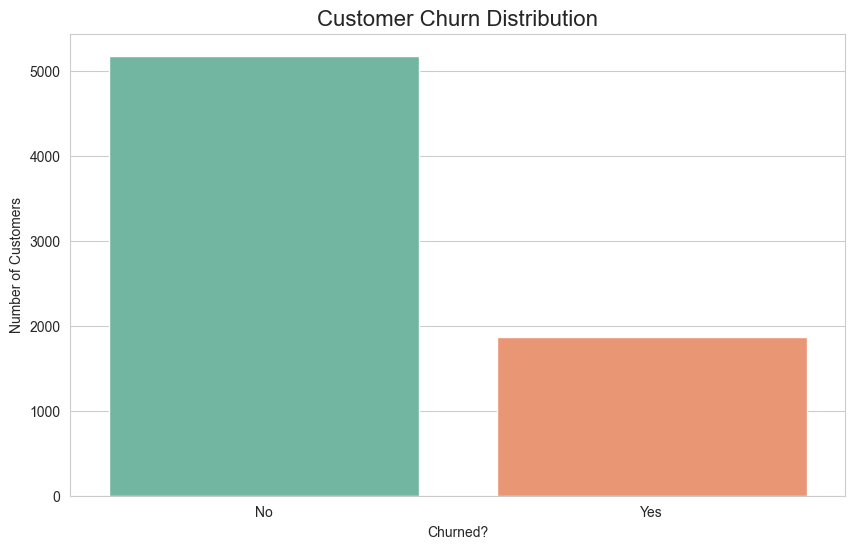

In [22]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution', fontsize=16)
plt.ylabel('Number of Customers')
plt.xlabel('Churned?')
plt.savefig('reports/images/churn_distribution.png', bbox_inches='tight')
plt.show()

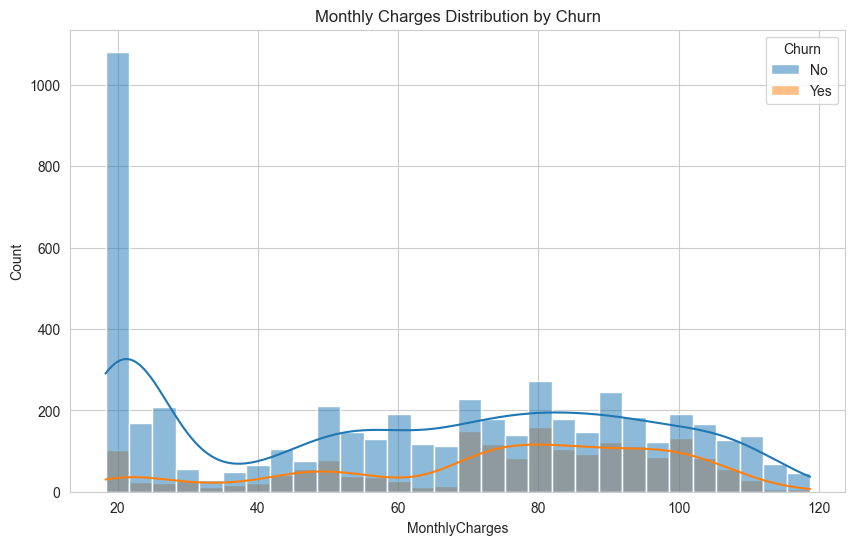

In [23]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Monthly Charges Distribution by Churn')
plt.savefig('reports/images/monthly_charges_vs_churn.png', bbox_inches='tight')
plt.show()

In [24]:
# Save cleaned version
df.to_csv("data/processed/cleaned_churn_data.csv", index=False)